In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import re

In [ ]:
train = pd.read_csv('books_train.csv')
test = pd.read_csv('books_test.csv')

In [ ]:
train.describe() 

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,8342.000000,8342.000000,8.342000e+03,8342.000000,8.342000e+03,8342.000000
mean,21368.066291,3.932359,9.755123e+12,336.865979,1.661127e+04,512.318029
std,13104.170810,0.348794,4.903334e+11,235.805259,9.854213e+04,2249.333746
min,2.000000,0.000000,2.004913e+10,0.000000,0.000000e+00,0.000000
25%,10387.250000,3.770000,9.780345e+12,192.000000,1.022500e+02,9.000000
50%,20424.500000,3.960000,9.780590e+12,300.000000,7.530000e+02,47.000000
75%,32188.250000,4.130000,9.780875e+12,416.000000,4.929750e+03,235.000000
max,45641.000000,5.000000,9.790008e+12,4736.000000,2.457092e+06,56604.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8342 entries, 0 to 8341
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              8342 non-null   int64  
 1   title               8342 non-null   object 
 2   authors             8342 non-null   object 
 3   average_rating      8342 non-null   float64
 4   isbn                8342 non-null   object 
 5   isbn13              8342 non-null   int64  
 6   language_code       8342 non-null   object 
 7     num_pages         8342 non-null   int64  
 8   ratings_count       8342 non-null   int64  
 9   text_reviews_count  8342 non-null   int64  
 10  publication_date    8342 non-null   object 
 11  publisher           8342 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 782.2+ KB


In [ ]:
train.isnull().sum() 

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
def preprocess(df):
    encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} # Unify the codes
    df.replace(encoding, inplace=True)
    enc = OrdinalEncoder()
    enc.fit(df[['language_code']])
    df[['language_code']] = enc.fit_transform(df[['language_code']])
    df['year'] = pd.DatetimeIndex(df['publication_date']).year 
    df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True) 
    # df['authors'] = df['authors'].apply(lambda x: x.split('/', 1)[0])
    df = df.drop(['publication_date', 'title', 'isbn', 'isbn13', 'publication_date'], axis=1)    
    return df
    

In [ ]:
# def preprocess_test(df, target):
#     encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} 
#     df.replace(encoding, inplace=True)
#     enc = OrdinalEncoder()
#     enc.fit(df[['language_code']])
#     df[['language_code']] = enc.fit_transform(df[['language_code']])
#     df['year'] = pd.DatetimeIndex(df['publication_date']).year 
#     df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)
#     df = df.drop(['publication_date', 'title', 'isbn', 'isbn13', 'publication_date', 'publisher'], axis=1)
#     df['authors'] = df['authors'].apply(lambda x: x.split('/', 1)[0])
   
#     return df
    

In [ ]:
!pip install -U scikit-learn

In [ ]:
!python -m pip show scikit-learn 

hy
Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: threadpoolctl, scipy, numpy, joblib
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn


In [ ]:
enc = OrdinalEncoder( handle_unknown='use_encoded_value', 
                      unknown_value=np.nan)  

train['authors'] = train['authors'].apply(lambda x: x.split('/', 1)[0])
test['authors'] = test['authors'].apply(lambda x: x.split('/', 1)[0])
enc.fit(train[['authors']])

train['authors'] = enc.transform(train[['authors']])
test['authors'] = enc.transform(test[['authors']])

enc.fit(train[['publisher']])

train['publisher'] = enc.transform(train[['publisher']])
test['publisher'] = enc.transform(test[['publisher']])

In [ ]:
train.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,26237,Revolutionary Girl Utena Vol. 3: To Sprout,489.0,4.05,1591162076,9781591162070,eng,200,1153,16,2/4/2004,1787.0
1,33448,Positioning: The Battle for Your Mind,30.0,4.04,0071359168,9780071359160,en-US,246,126,9,1/18/2001,1066.0
2,13739,Twelve Fair Kingdoms,3185.0,3.99,0425058506,9780425058503,eng,195,141,10,3/1/1983,207.0
3,2711,The Riverside Chaucer,1099.0,4.18,0395290317,9780395290316,enm,1327,7760,152,12/12/1987,845.0
4,40540,PHP and MySQL Web Development (Developer's Lib...,2060.0,3.96,0672326728,752063326725,en-US,1008,590,31,10/1/2004,1500.0


### There were 2 missing dates in dataset, found them online
### not the best choice of fillna, but ok for this task (no missing dates in test)

In [ ]:
train.loc[train.bookID == 31373, 'publication_date'] = '1999-10-01 00:00:00'
train.loc[train.bookID == 45531, 'publication_date'] = '1975-10-01 00:00:00'

In [ ]:
train2 = preprocess(train)
test2 = preprocess(test)

In [ ]:
train2.head()

,bookID,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,year
0,26237,489.0,4.05,1.0,200,1153,16,2004
1,33448,30.0,4.04,1.0,246,126,9,2001
2,13739,3185.0,3.99,1.0,195,141,10,1983
3,2711,1099.0,4.18,2.0,1327,7760,152,1987
4,40540,2060.0,3.96,1.0,1008,590,31,2004


In [ ]:
test2.head()

,bookID,authors,language_code,num_pages,ratings_count,text_reviews_count,year
0,2538,1731.0,13.0,380,1295,106,2004
1,31912,NaN,1.0,335,2519,85,2003
2,7716,1106.0,1.0,336,265,10,2003
3,7811,3199.0,1.0,275,30,3,2001
4,19379,2184.0,1.0,301,9,1,1990


In [ ]:
test2 = test2.fillna(0)

In [ ]:
test2.head()

,bookID,authors,language_code,num_pages,ratings_count,text_reviews_count,year,authors_cat
0,2538,José Saramago,13.0,380,1295,106,2004,3.965374
13,31912,James B. South,1.0,335,2519,85,2003,3.942145
14,7716,George Bernard Shaw,1.0,336,265,10,2003,3.939573
19,7811,T. Coraghessan Boyle,1.0,275,30,3,2001,3.882724
25,19379,Mark Twain,1.0,301,9,1,1990,3.963227


In [ ]:
# train2 = train2.drop('authors', axis=1)
# test2 = test2.drop('authors', axis=1)

# 3. EDA

### Let's plot correlation matrix with heatmap (red = strong, blue = weak)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


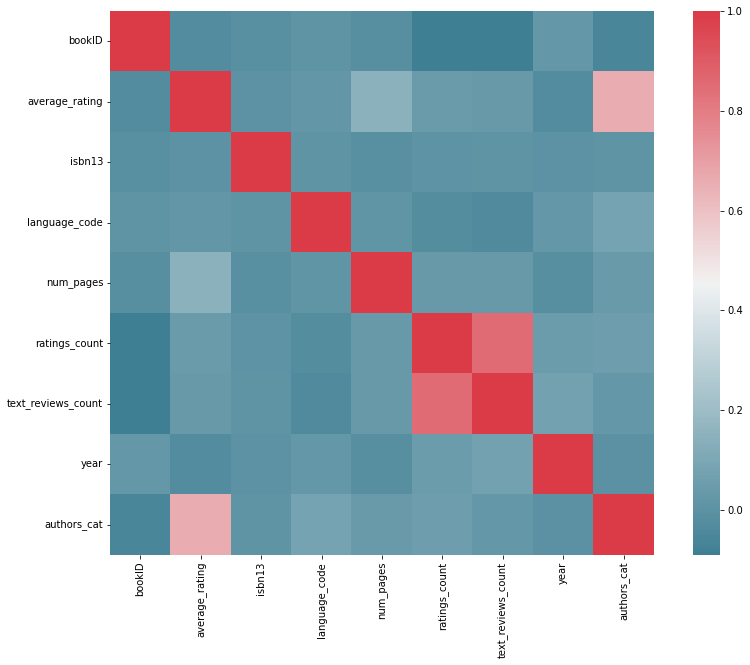

In [ ]:
fig = plt.gcf()
fig.set_size_inches(14, 10)
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

### Found strong correlation between ratings_count and text_reviews_count

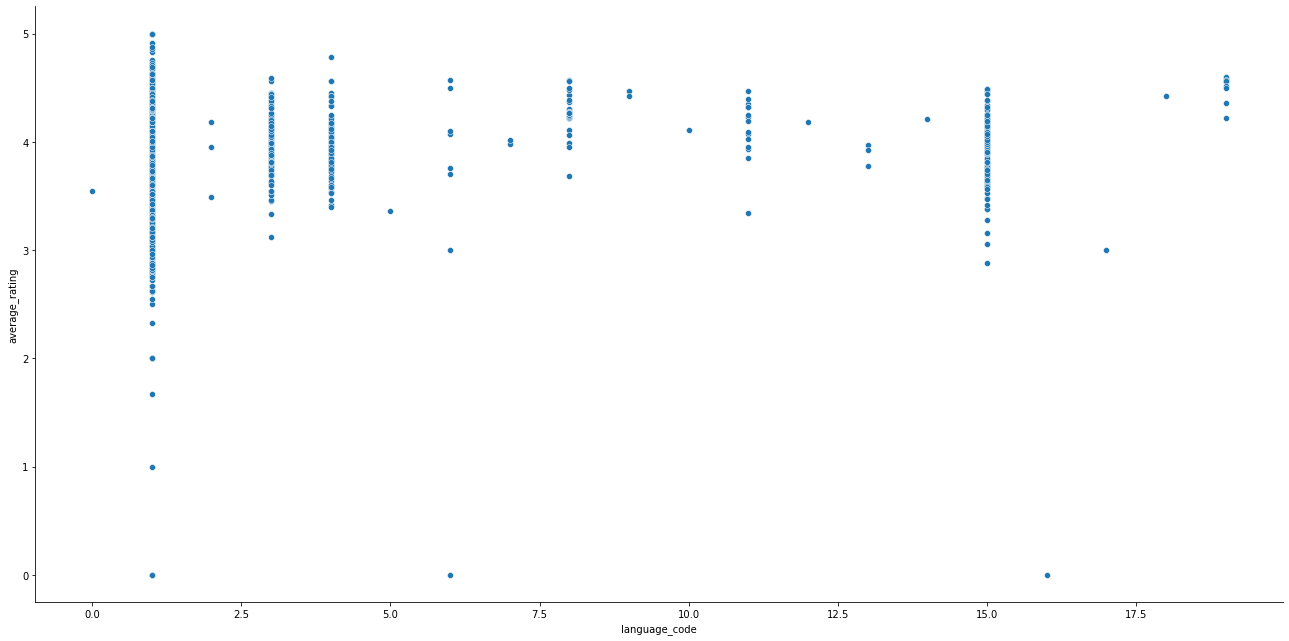

In [ ]:
sns.relplot(x="language_code", y="average_rating", data=train, height=9, aspect = 2)

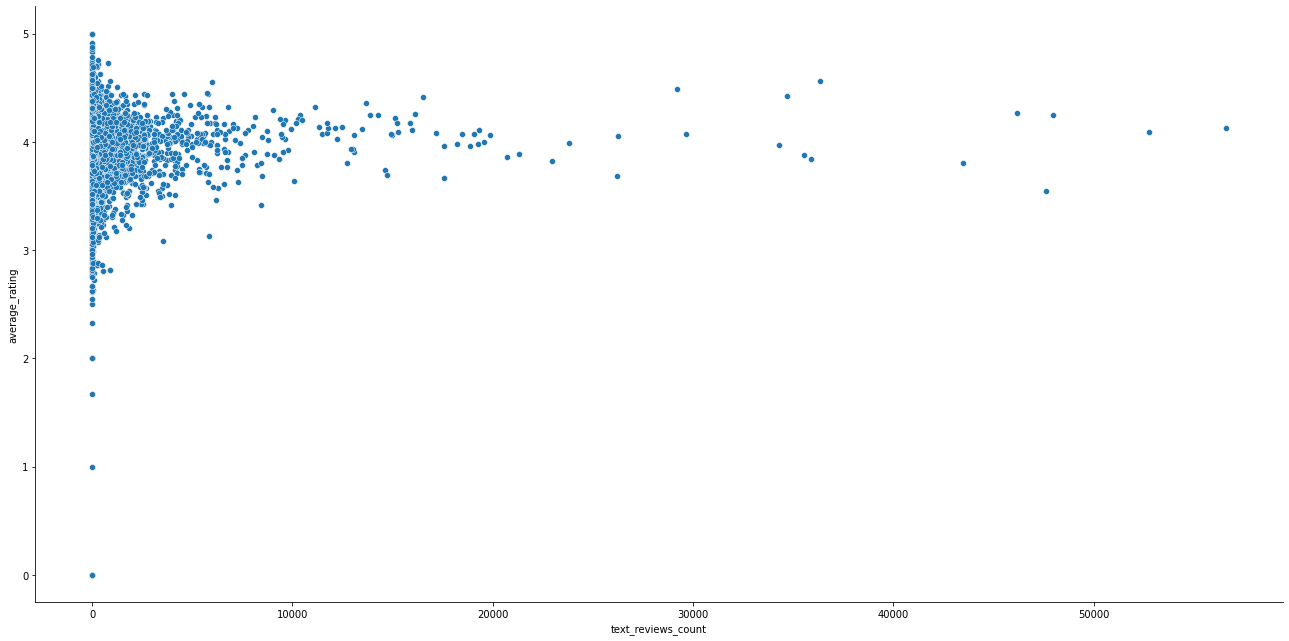

In [ ]:
sns.relplot(x="text_reviews_count", y="average_rating", data=train, height=9, aspect = 2)

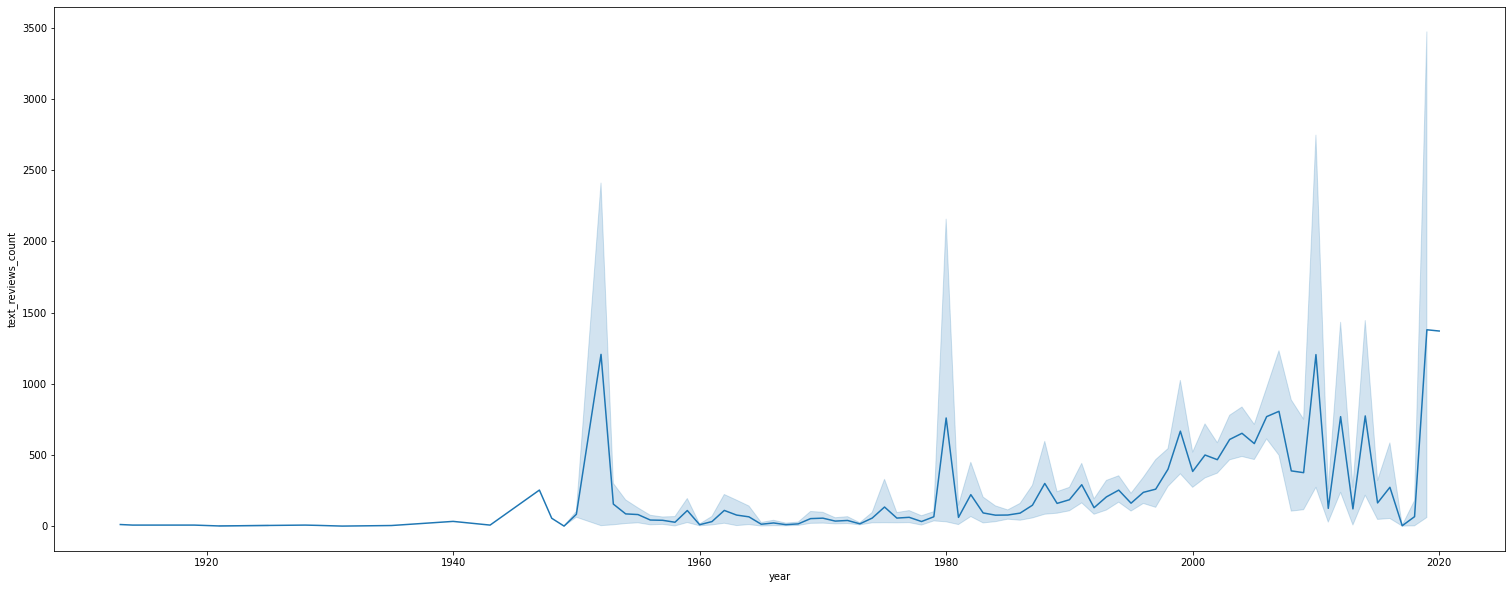

In [ ]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="year", y="text_reviews_count", data=train)

# 5. Model building

In [ ]:
y = train2['average_rating'].values

In [ ]:
train = train2.drop(['average_rating'], axis=1)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

Let's use RandomizedSearch to get best hyperparameters for AdaBoost

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [5, 10, 15, 20, 8]
}

grad_Ada = RandomizedSearchCV(model, parameters, refit=True, error_score ='raise')

X_train = X_train.fillna(0)
 

grad_Ada.fit(X_train, y_train)

print('Best Score: ', grad_Ada.best_score_*100, '\nBest Parameters: ', grad_Ada.best_params_)

Best Score:  10.172372839353432 
Best Parameters:  {'n_estimators': 10, 'learning_rate': 0.05}


In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [ ]:
X_train = X_train.drop('ratings_count', axis=1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

# parameters = {
#     'learning_rate': [0.05, 0.1, 0.15, 0.2],
#     'n_estimators': [5, 10, 15, 20, 8]
# }

parameters = {'learning_rate': sp_randFloat(),
              'n_estimators' : sp_randInt(100, 300)
             }

grad_Ada = RandomizedSearchCV(model, parameters, refit=True, error_score ='raise')

 

grad_Ada.fit(X_train, y_train)

print('Best Score: ', grad_Ada.best_score_, '\nBest Parameters: ', grad_Ada.best_params_)

Best Score:  0.011134934915672013 
Best Parameters:  {'learning_rate': 0.18662150162296276, 'n_estimators': 112}


In [ ]:
X_train.corr()

,bookID,authors,language_code,num_pages,ratings_count,text_reviews_count,year
bookID,1.000000,0.002971,0.006187,-0.007962,-0.091524,-0.092540,0.036599
authors,0.002971,1.000000,-0.011019,-0.010843,-0.001530,-0.016190,-0.007216
language_code,0.006187,-0.011019,1.000000,0.007798,-0.024730,-0.035917,0.024160
num_pages,-0.007962,-0.010843,0.007798,1.000000,0.035670,0.034953,-0.023717
ratings_count,-0.091524,-0.001530,-0.024730,0.035670,1.000000,0.854239,0.044317
text_reviews_count,-0.092540,-0.016190,-0.035917,0.034953,0.854239,1.000000,0.070893
year,0.036599,-0.007216,0.024160,-0.023717,0.044317,0.070893,1.000000


In [ ]:
test2

,bookID,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
0,2538,1731.0,13.0,380,1295,106,1394.0,2004
1,31912,NaN,1.0,335,2519,85,1211.0,2003
2,7716,1106.0,1.0,336,265,10,1288.0,2003
3,7811,3199.0,1.0,275,30,3,NaN,2001
4,19379,2184.0,1.0,301,9,1,1781.0,1990
...,...,...,...,...,...,...,...,...
2776,26449,NaN,1.0,768,66,7,362.0,1991
2777,32298,3332.0,1.0,210,785,13,1701.0,2007
2778,28456,3435.0,1.0,262,1128,79,116.0,2010
2779,14719,NaN,1.0,304,843,57,1685.0,1998


In [ ]:
def sub(y_pred):
    sub = pd.read_csv('books_sample_submission.csv')
    sub.average_rating = y_pred
    sub.to_csv(f'attempt_pub.csv', index=False)
    return sub

In [ ]:
test

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,2538,El hombre duplicado,1731.0,8466312803,9788466312806,13.0,380,1295,106,9/1/2004,Punto de Lectura,2004
1,31912,Buffy the Vampire Slayer and Philosophy: Fear ...,NaN,0812695313,9780812695311,1.0,335,2519,85,3/13/2003,Open Court,2003
2,7716,Plays Pleasant,1106.0,0140437940,9780140437942,1.0,336,265,10,3/27/2003,Penguin Classics,2003
3,7811,A Friend of the Earth,3199.0,0747553467,9780747553465,1.0,275,30,3,10/8/2001,Bloomsbury Paperbacks,2001
4,19379,Mark Twain's Own Autobiography: The Chapters f...,2184.0,0299125408,9780299125400,1.0,301,9,1,10/1/1990,University of Wisconsin Press,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
2776,26449,Bulfinch's Mythology,NaN,0062700251,9780062700254,1.0,768,66,7,12/24/1991,Collins Reference,1991
2777,32298,Blame! Vol. 7,3332.0,1595328408,9781595328403,1.0,210,785,13,2/1/2007,TokyoPop,2007
2778,28456,Carpenter's Gothic,3435.0,184354167X,9781843541677,1.0,262,1128,79,2/1/2010,Atlantic Books (UK),2010
2779,14719,Your First Year in Network Marketing: Overcome...,NaN,0761512195,9780761512196,1.0,304,843,57,1/7/1998,Three Rivers Press,1998


In [ ]:
test3 = test2.drop('ratings_count', axis=1)

In [ ]:
test2 = test2.fillna(0)

In [ ]:
test2

,bookID,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
0,2538,1731.0,13.0,380,1295,106,1394.0,2004
1,31912,NaN,1.0,335,2519,85,1211.0,2003
2,7716,1106.0,1.0,336,265,10,1288.0,2003
3,7811,3199.0,1.0,275,30,3,NaN,2001
4,19379,2184.0,1.0,301,9,1,1781.0,1990
...,...,...,...,...,...,...,...,...
2776,26449,NaN,1.0,768,66,7,362.0,1991
2777,32298,3332.0,1.0,210,785,13,1701.0,2007
2778,28456,3435.0,1.0,262,1128,79,116.0,2010
2779,14719,NaN,1.0,304,843,57,1685.0,1998


In [ ]:
pred_adaboost = grad_Ada.predict(test2)

In [ ]:
sub(regressor.predict(test2))

,bookID,average_rating
0,2538,3.959210
1,31912,3.927166
2,7716,3.950451
3,7811,3.962546
4,19379,3.946633
...,...,...
2776,26449,3.936389
2777,32298,3.941090
2778,28456,3.947404
2779,14719,3.937591


In [ ]:
sub(pred_adaboost)

,bookID,average_rating
0,2538,3.856593
1,31912,3.860341
2,7716,3.856593
3,7811,3.852076
4,19379,3.854742
...,...,...
2776,26449,4.030360
2777,32298,3.886268
2778,28456,3.850709
2779,14719,3.860341
